Importing all important packages.

In [1]:
import pyspedas
#from pyqtgraph.graphicsItems.PlotDataItem import dataType
from pyspedas import tplot
import matplotlib.pyplot as plt
#import pandas as pd
import numpy as np

13-Oct-25 15:08:19: C:\Users\Brian\anaconda3\envs\Research_Espen\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(



Importing Omni and Themis Data

In [2]:
pyspedas.projects.omni.data(trange=["2024-09-27/00:00:00","2024-09-28/23:59:59"],datatype='1min',level='hro2',time_clip=True)

13-Oct-25 15:08:20: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2024/
13-Oct-25 15:08:22: File is current: omni_data/hro2_1min/2024/omni_hro2_1min_20240901_v01.cdf


['IMF',
 'PLS',
 'IMF_PTS',
 'PLS_PTS',
 'percent_interp',
 'Timeshift',
 'RMS_Timeshift',
 'RMS_phase',
 'Time_btwn_obs',
 'F',
 'BX_GSE',
 'BY_GSE',
 'BZ_GSE',
 'BY_GSM',
 'BZ_GSM',
 'RMS_SD_B',
 'RMS_SD_fld_vec',
 'flow_speed',
 'Vx',
 'Vy',
 'Vz',
 'proton_density',
 'T',
 'NaNp_Ratio',
 'Pressure',
 'E',
 'Beta',
 'Mach_num',
 'Mgs_mach_num',
 'x',
 'y',
 'z',
 'BSN_x',
 'BSN_y',
 'BSN_z',
 'AE_INDEX',
 'AL_INDEX',
 'AU_INDEX',
 'SYM_D',
 'SYM_H',
 'ASY_D',
 'ASY_H']

In [3]:
pyspedas.projects.themis.fgm(trange=["2024-09-27/00:00:00","2024-09-28/23:59:59"],probe=['b','c'],level="l2",time_clip=True)

13-Oct-25 15:08:24: Downloading remote index: https://themis.ssl.berkeley.edu/data/themis/thb/l2/fgm/2024/
13-Oct-25 15:08:27: File is current: themis_data/thb/l2/fgm/2024/thb_l2_fgm_20240927_v01.cdf
13-Oct-25 15:08:28: File is current: themis_data/thb/l2/fgm/2024/thb_l2_fgm_20240928_v01.cdf
13-Oct-25 15:08:28: Downloading remote index: https://themis.ssl.berkeley.edu/data/themis/thc/l2/fgm/2024/
13-Oct-25 15:08:30: File is current: themis_data/thc/l2/fgm/2024/thc_l2_fgm_20240927_v01.cdf
13-Oct-25 15:08:32: File is current: themis_data/thc/l2/fgm/2024/thc_l2_fgm_20240928_v01.cdf


['thb_fgs_btotal',
 'thb_fgs_gse',
 'thb_fgs_gsm',
 'thb_fgs_dsl',
 'thb_fgl_btotal',
 'thb_fgl_gse',
 'thb_fgl_gsm',
 'thb_fgl_dsl',
 'thb_fgl_ssl',
 'thb_fgh_btotal',
 'thb_fgh_gse',
 'thb_fgh_gsm',
 'thb_fgh_dsl',
 'thb_fgh_ssl',
 'thc_fgs_btotal',
 'thc_fgs_gse',
 'thc_fgs_gsm',
 'thc_fgs_dsl',
 'thc_fgl_btotal',
 'thc_fgl_gse',
 'thc_fgl_gsm',
 'thc_fgl_dsl',
 'thc_fgl_ssl',
 'thc_fgh_btotal',
 'thc_fgh_gse',
 'thc_fgh_gsm',
 'thc_fgh_dsl',
 'thc_fgh_ssl']

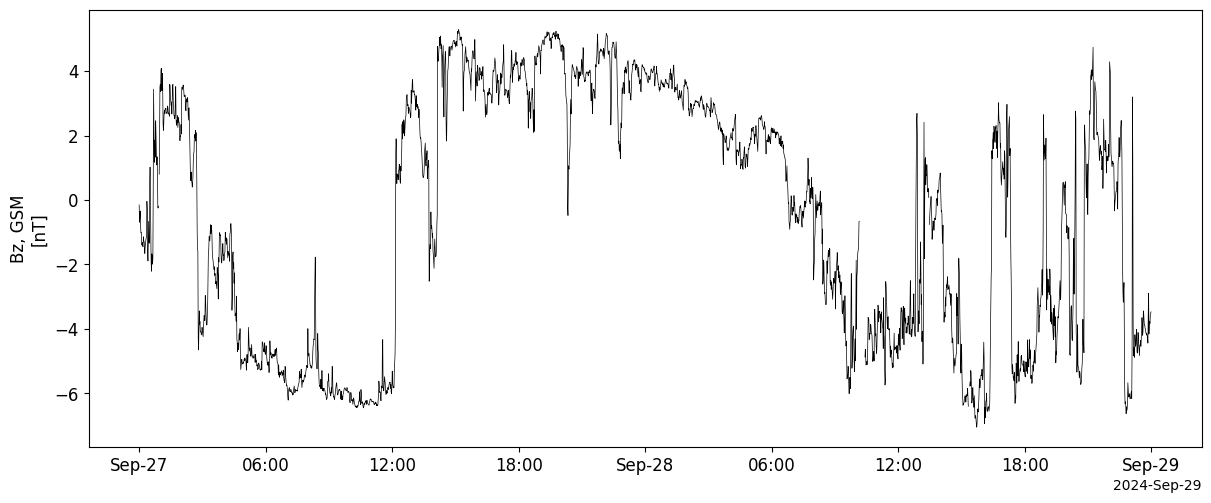

In [4]:
tplot(['BZ_GSM'])

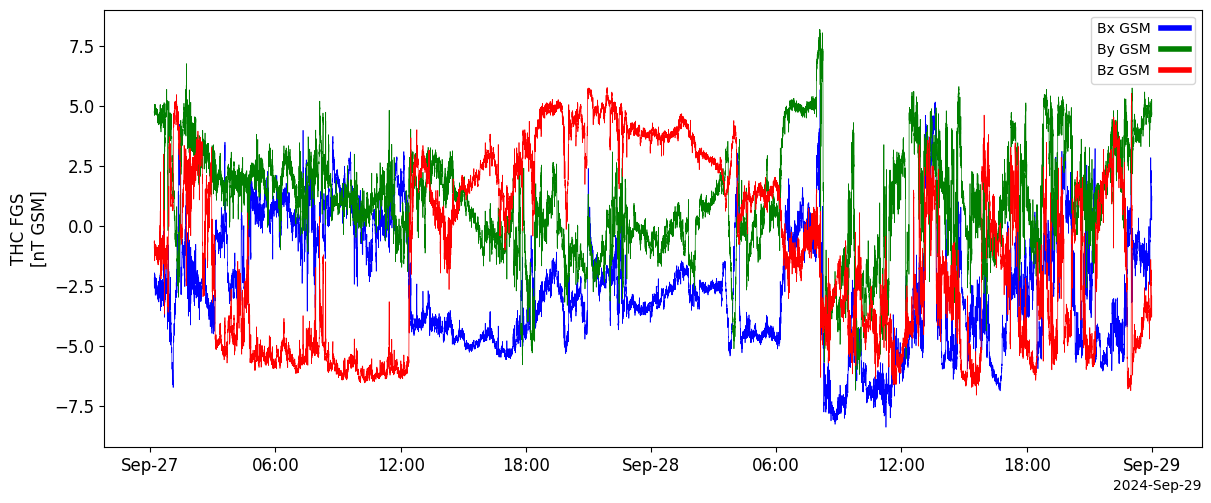

In [22]:
tplot(['thc_fgs_gsm'])

In [6]:
omni_bz = pyspedas.get_data('BZ_GSM',dt = True)


In [7]:
omni_bz

variable(times=array(['2024-09-27T00:00:00.000000000', '2024-09-27T00:01:00.000000000',
       '2024-09-27T00:02:00.000000000', ...,
       '2024-09-28T23:57:00.000000000', '2024-09-28T23:58:00.000000000',
       '2024-09-28T23:59:00.000000000'],
      shape=(2880,), dtype='datetime64[ns]'), y=array([-0.15, -0.69, -0.54, ..., -3.52, -3.5 , -3.47],
      shape=(2880,), dtype=float32))

In [23]:
artemis_fgs_gsm = pyspedas.get_data('thc_fgs_gsm',dt = True)

In [32]:
artemis_fgs_gsm[1][:,2]


array([-0.7010137 , -0.70099586, -0.6163725 , ..., -3.30971   ,
       -3.6714838 , -3.7592897 ], shape=(41887,), dtype=float32)

In [10]:
artemis_fgs_gsm[1][0][2]



np.float32(-0.7010137)

In [11]:
artemis_bz = []
for i in range(len(artemis_fgs_gsm[0])):
    artemis_bz.append(artemis_fgs_gsm[1][i][2])

In [12]:
#print(artemis_bz)

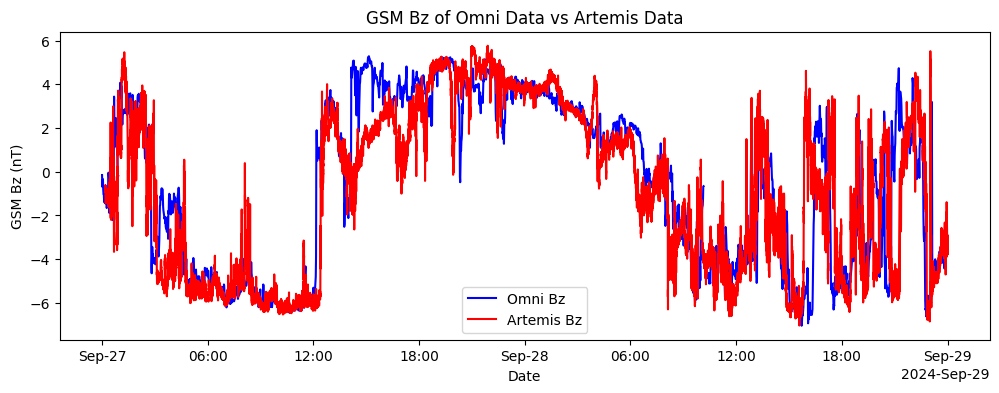

In [29]:
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(omni_bz[0], omni_bz[1], label='Omni Bz', color='blue', linestyle='-')
plt.plot(artemis_fgs_gsm[0], artemis_fgs_gsm[1][:,2], label='Artemis Bz', color='red', linestyle='-')
plt.xlabel('Date')
plt.ylabel('GSM Bz (nT)')
plt.title('GSM Bz of Omni Data vs Artemis Data')
plt.legend()
plt.show()

Determining which spacecraft captured which datapoints (whether it is Ace or Wind)

In [15]:
SPA_ID = pyspedas.get_data('IMF',dt = True)

In [16]:
#print(SPA_ID)

variable(times=array(['2024-09-27T00:00:00.000000000', '2024-09-27T00:01:00.000000000',
       '2024-09-27T00:02:00.000000000', ...,
       '2024-09-28T23:57:00.000000000', '2024-09-28T23:58:00.000000000',
       '2024-09-28T23:59:00.000000000'],
      shape=(2880,), dtype='datetime64[ns]'), y=array([52, 52, 52, ..., 52, 52, 52], shape=(2880,), dtype=int32))


In [17]:
upstream_wind = []
upstream_wind_time = []
upstream_ace = []
upstream_ace_time = []
upstream_other = []
upstream_other_time = []
for i in range(len(SPA_ID[1])):
    if SPA_ID[1][i] == 51 or 52:
        upstream_wind.append(omni_bz[1][i])
        upstream_wind_time.append(omni_bz[0][i])
    elif SPA_ID[1][i] == 71:
        upstream_ace.append(omni_bz[1][i])
        upstream_ace_time.append(omni_bz[0][i])
    else:
        upstream_other.append(omni_bz[1][i])
        upstream_other_time.append(omni_bz[0][i])



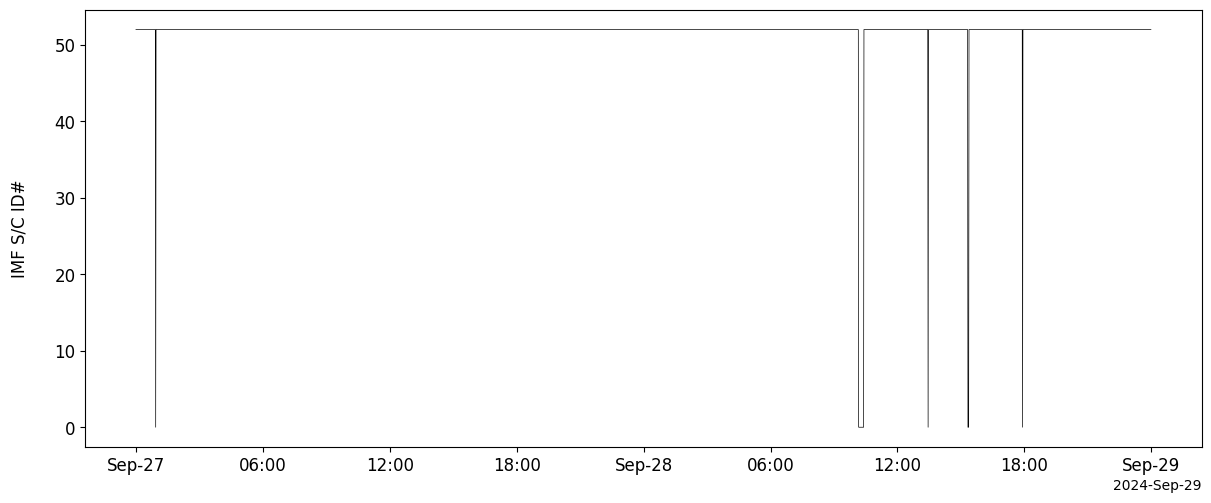

In [18]:
tplot(['IMF'])

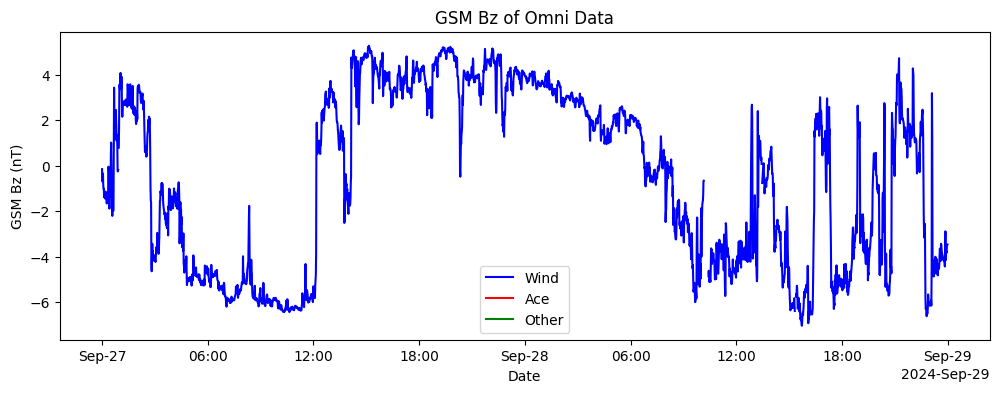

In [20]:
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(upstream_wind_time, upstream_wind, label='Wind', color='blue', linestyle='-')
plt.plot(upstream_ace_time, upstream_ace, label='Ace', color='red', linestyle='-')
plt.plot(upstream_other_time, upstream_other, label='Other', color='green', linestyle='-')
plt.xlabel('Date')
plt.ylabel('GSM Bz (nT)')
plt.title('GSM Bz of Omni Data')
plt.legend()
plt.show()